In [169]:
import numpy as np

np.random.seed(0)

In [170]:
from sklearn.datasets import load_boston

boston = load_boston()

In [171]:
rnd_indices = np.random.permutation(boston.data.shape[0])
train_size = int(boston.data.shape[0]*0.8)
train_indices = rnd_indices[:train_size]
test_indices = rnd_indices[train_size:]

train_data = boston.data[train_indices, :]
test_data = boston.data[test_indices, :]
train_target = boston.target[train_indices]
test_target = boston.target[test_indices]

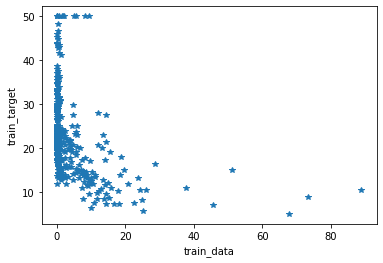

In [172]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(train_data[:,0], train_target, "*")
plt.xlabel("train_data")
plt.ylabel("train_target")
plt.show()

Text(0.5, 0, 'Feature 6')

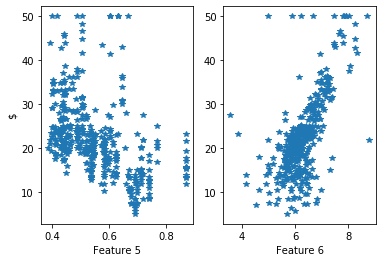

In [173]:
plt.subplot(1,2,1)
plt.plot(train_data[:,4], train_target, "*")
plt.xlabel("Feature 5")
plt.ylabel("$")

plt.subplot(1,2,2)
plt.plot(train_data[:,5], train_target, "*")
plt.xlabel("Feature 6")

In [174]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_data,train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [175]:
train_predict = lin_reg.predict(train_data)
test_predict = lin_reg.predict(test_data)

train_rmse = np.sqrt(((train_target - train_predict) ** 2).mean())
test_rmse = np.sqrt(((test_target - test_predict) ** 2).mean())

print(train_rmse)
print(test_rmse)

4.854290583096463
4.060118093883479


Text(0.5, 0, 'Feature 11 after')

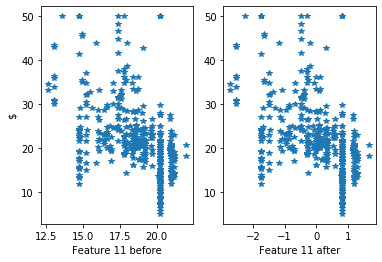

In [176]:
from sklearn.preprocessing import StandardScaler

plt.subplot(1,2,1)
plt.plot(train_data[:,10], train_target, "*")
plt.xlabel("Feature 11 before")
plt.ylabel("$")

scaler = StandardScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

plt.subplot(1,2,2)
plt.plot(scaled_train_data[:,10], train_target, "*")
plt.xlabel("Feature 11 after")

In [177]:
lin_reg.fit(scaled_train_data,train_target)

train_predict = lin_reg.predict(scaled_train_data)
test_predict = lin_reg.predict(scaled_test_data)

train_rmse = np.sqrt(((train_target - train_predict) ** 2).mean())
test_rmse = np.sqrt(((test_target - test_predict) ** 2).mean())

print(train_rmse)
print(test_rmse)

4.854290583096463
4.06011809388348


In [178]:
# fit a ridge regressor
alpha_ridge = 1 
ridge_reg = Ridge(alpha_ridge, solver = "cholesky")
ridge_reg.fit(train_data, train_target)

# fit a lasso regressor
alpha_lasso = 1
lasso_reg = Lasso(alpha_lasso)
lasso_reg.fit(train_data, train_target)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [179]:

lin_reg = LinearRegression()
lin_reg.fit(train_data,train_target)

#vanilla
train_predict = lin_reg.predict(train_data)
test_predict = lin_reg.predict(test_data)

train_rmse = np.sqrt(((train_target - train_predict) ** 2).mean())
test_rmse = np.sqrt(((test_target - test_predict) ** 2).mean())

print("vanilla train: ",train_rmse)
print("vanilla test: ",test_rmse)


#ridge
train_predict = ridge_reg.predict(train_data)
test_predict = ridge_reg.predict(test_data)

train_rmse = np.sqrt(((train_target - train_predict) ** 2).mean())
test_rmse = np.sqrt(((test_target - test_predict) ** 2).mean())

print("Ridge train: ",train_rmse)
print("Ridge test: ",test_rmse)


#lasso
train_predict = lasso_reg.predict(train_data)
test_predict = lasso_reg.predict(test_data)

train_rmse = np.sqrt(((train_target - train_predict) ** 2).mean())
test_rmse = np.sqrt(((test_target - test_predict) ** 2).mean())

print("Lasso train: ",train_rmse)
print("Lasso test: ",test_rmse)

vanilla train:  4.854290583096463
vanilla test:  4.060118093883479
Ridge train:  4.874044350170759
Ridge test:  4.115561183052367
Lasso train:  5.323133981182158
Lasso test:  5.422054114286459


In [180]:
#scaled version
scaler = StandardScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

#vanilla
lin_reg = LinearRegression()
lin_reg.fit(scaled_train_data,train_target)
train_lin_predict = lin_reg.predict(scaled_train_data)
test_lin_predict = lin_reg.predict(scaled_test_data)

train_rmse = np.sqrt(((train_target - train_lin_predict) ** 2).mean())
test_rmse = np.sqrt(((test_target - test_lin_predict) ** 2).mean())

print("vanilla train: ",train_rmse)
print("vanilla test: ",test_rmse)


#ridge
alpha_ridge = 1 
ridge_reg = Ridge(alpha_ridge, solver = "cholesky")
ridge_reg.fit(scaled_train_data, train_target)

train_ridge_predict = ridge_reg.predict(scaled_train_data)
test_ridge_predict = ridge_reg.predict(scaled_test_data)

train_ridge_rmse = np.sqrt(((train_target - train_ridge_predict) ** 2).mean())
test_ridge_rmse = np.sqrt(((test_target - test_ridge_predict) ** 2).mean())

print("Ridge train: ",train_ridge_rmse)
print("Ridge test: ",test_ridge_rmse)


#lasso
alpha_lasso = 1
lasso_reg = Lasso(alpha_lasso)
lasso_reg.fit(scaled_train_data, train_target)

train_lasso_predict = lasso_reg.predict(scaled_train_data)
test_lasso_predict = lasso_reg.predict(scaled_test_data)

train_lasso_rmse = np.sqrt(((train_target - train_lasso_predict) ** 2).mean())
test_lasso_rmse = np.sqrt(((test_target - test_lasso_predict) ** 2).mean())

print("Lasso train: ",train_lasso_rmse)
print("Lasso test: ",test_lasso_rmse)

vanilla train:  4.854290583096463
vanilla test:  4.06011809388348
Ridge train:  4.8545071635431585
Ridge test:  4.0534804065699825
Lasso train:  5.495930817367756
Lasso test:  5.225049959468015


In [181]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]}
ridge_reg = Ridge(solver = "cholesky")
grid_search = GridSearchCV(ridge_reg, param_grid)
grid_search.fit(train_data, train_target)
a = grid_search.best_params_

param_grid = {'alpha': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]}
lasso_reg = Lasso()
grid_search = GridSearchCV(lasso_reg, param_grid)
grid_search.fit(train_data, train_target)
b = grid_search.best_params_

print(a,b)

C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\sklearn\model_selection\_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is

{'alpha': 0} {'alpha': 0}


C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4759.955687158083, tolerance: 3.227500324257426
  positive)


In [182]:
from sklearn.svm import LinearSVR

epsilon_svm = 1
svm_reg = LinearSVR(epsilon_svm)
svm_reg.fit(train_data, train_target)

train_predict = svm_reg.predict(train_data)
test_predict = svm_reg.predict(test_data)

train_rmse = np.sqrt(((train_target - train_predict) ** 2).mean())
test_rmse = np.sqrt(((test_target - test_predict) ** 2).mean())

print(train_rmse)
print(test_rmse)

6.772281599342022
6.718954955091895


C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [183]:
param_grid = {'epsilon': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]}
svm_reg = LinearSVR(max_iter=100000)
grid_search = GridSearchCV(svm_reg, param_grid)
grid_search.fit(train_data, train_target)
grid_search.best_params_



C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\sklearn\svm\base.py:92

C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to conver

{'epsilon': 1.8}

In [184]:
n = 100
data = 12 * np.random.rand(n,1)-3.9
target = 0.09 * (data**3) + 0.3 * (data**2) -4.1 * data - 2.4 + 4.79 * np.random.randn(n,1)

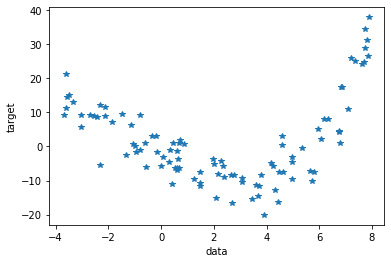

In [185]:
plt.figure()
plt.plot(data,target,"*")
plt.xlabel("data")
plt.ylabel("target")
plt.show()

In [186]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
poly_train_data = poly_features.fit_transform(train_data)
lin_reg = LinearRegression()
lin_reg.fit(poly_train_data, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [189]:
# fit a ridge regressor
alpha_ridge = 1
ridge_reg = Ridge(alpha_ridge, solver = "cholesky")
ridge_reg.fit(poly_train_data, train_target)

# fit a lasso regressor
alpha_lasso = 1
lasso_reg = Lasso(alpha_lasso)
lasso_reg.fit(poly_train_data, train_target)

poly_test_data = poly_features.fit_transform(test_data)

#vanilla
train_lin_predict = lin_reg.predict(poly_train_data)
test_lin_predict = lin_reg.predict(poly_test_data)

train_rmse = np.sqrt(((train_target - train_lin_predict) ** 2).mean())
test_rmse = np.sqrt(((test_target - test_lin_predict) ** 2).mean())

print("vanilla train: ",train_rmse)
print("vanilla test: ",test_rmse)


#ridge
train_predict = ridge_reg.predict(poly_train_data)
test_predict = ridge_reg.predict(poly_test_data)

train_rmse = np.sqrt(((train_target - train_predict) ** 2).mean())
test_rmse = np.sqrt(((test_target - test_predict) ** 2).mean())

print("Ridge train: ",train_rmse)
print("Ridge test: ",test_rmse)


#lasso
train_predict = lasso_reg.predict(poly_train_data)
test_predict = lasso_reg.predict(poly_test_data)

train_rmse = np.sqrt(((train_target - train_predict) ** 2).mean())
test_rmse = np.sqrt(((test_target - test_predict) ** 2).mean())

print("Lasso train: ",train_rmse)
print("Lasso test: ",test_rmse)

vanilla train:  2.514796223198793
vanilla test:  2.7608425106978762
Ridge train:  2.5983847822856574
Ridge test:  2.8690786754723976
Lasso train:  3.307673424475558
Lasso test:  2.8649334890180915


C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2589.8021978200195, tolerance: 3.227500324257426
  positive)


In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_reg.fit(train_data, np.ravel(train_target))

C:\Users\thwal\Anaconda3\envs\Comp3222\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:







plt.figure()
plt.plot(train_data, train_target, "*", train_data, lin_train_predict, ".", test_data, test_target, "*", test_data, lin_test_predict, ".")